In [1]:
%run ml_header.py

# Logistic Regression

Some regression algorithms can be used for classification as well (and vice versa). *Logic Regression* (also called *Logit Regression*) is commonly used to estimate the probablity that an instance belongs to a pariticular class.

Logistic Regression model estimated probablity (vectorized form)

$\widehat{p}=h_\theta(x)=\sigma(\theta^T\cdot x)$

Logistic function (sigmoid function)

$\sigma(t)=\frac{1}{1+exp(-t)}$

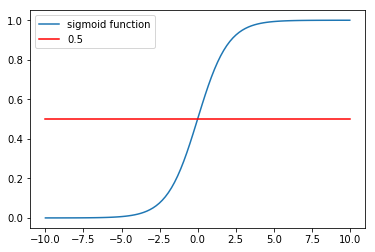

In [2]:
# Sigmoid function
t = np.linspace(-10, 10, 100)
tt = np.ones((100, 1)) * 0.5
ht = 1 / (1 + np.exp(-t))
plt.plot(t, ht, label='sigmoid function')
plt.plot(t, tt, 'r', label='0.5')
plt.legend(loc="upper left")
plt.show()

## Cost Function

$c(\theta)=\left\{
 \begin{array}{lr}
  -log(\widehat{p})   & if \quad y=1\\
  -log(1-\widehat{p}) & if \quad y=0
 \end{array}
 \right.$

$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\widehat{p}^{(i)})+(1-y^{(i)})log(1-\widehat{p}^{(i)})]$

In [3]:
# Load dataset: Flowers
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [4]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Test set
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

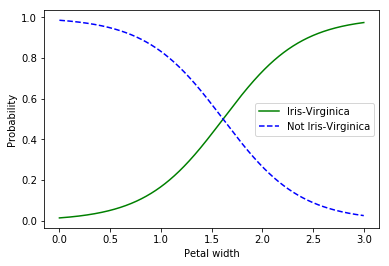

In [7]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend(loc='best')
plt.xlabel('Petal width')
plt.ylabel('Probability')
plt.show()

# Softmax Regression

Every target class has a set of $\theta$. It consist of several Logistic Regressors.

In [8]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

In [9]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# Return the predicted class
softmax_reg.predict([[5, 2]])

array([2])

In [11]:
# Return the probablities of each class
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134078e-07,   5.75276066e-02,   9.42471760e-01]])

In [12]:
softmax_reg.classes_

array([0, 1, 2])